In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm



# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/Websiteforecasting2.csv")
print(data)

           Date  Views    Country      Traffic      Rating
0    01/06/2021   7831        USA        234.0           2
1    02/06/2021   7798    Germany        235.0           3
2    03/06/2021   7401     Africa        236.0           4
3    04/06/2021   7054      India        237.0           5
4    05/06/2021   7973   Pakistan          NaN           4
..          ...    ...        ...          ...         ...
386  22/06/2022  11154      Japan        890.0           3
387  23/06/2022  10382      Nepal          0.0           5
388  24/06/2022   9555      Korea        900.0           4
389  25/06/2022   8502        USA        246.0           2
390  26/06/2022   8368    Germany        234.0           2

[391 rows x 5 columns]


In [ ]:
data.shape

(391, 6)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            391 non-null    datetime64[ns]
 1   views           391 non-null    int64         
 2   country         391 non-null    object        
 3   traffic         388 non-null    float64       
 4   rating          391 non-null    int64         
 5   traffic_binary  391 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 18.5+ KB
None


In [ ]:
print(data.columns)

Index(['date', 'views', 'country', 'traffic', 'rating', 'traffic_binary'], dtype='object')


In [ ]:
data.describe()

,date,views,traffic,rating,traffic_binary
count,391,391.000000,388.000000,391.000000,391.000000
mean,2021-12-13 00:00:00,8482.606138,337.097938,3.496164,0.460358
min,2021-06-01 00:00:00,4478.000000,0.000000,2.000000,0.000000
25%,2021-09-06 12:00:00,7603.000000,234.000000,3.000000,0.000000
50%,2021-12-13 00:00:00,8363.000000,237.000000,3.000000,0.000000
75%,2022-03-20 12:00:00,9304.000000,567.000000,4.000000,1.000000
max,2022-06-26 00:00:00,12156.000000,900.000000,5.000000,1.000000
std,NaN,1279.661279,294.284787,1.027499,0.499065


In [ ]:
data["Date"] = pd.to_datetime(data["Date"],
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         391 non-null    datetime64[ns]
 1   Views        391 non-null    int64         
 2      Country   391 non-null    object        
 3       Traffic  388 non-null    float64       
 4       Rating   391 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 15.4+ KB
None


In [ ]:
print(data.isnull().sum())

Date           0
Views          0
   Country     0
    Traffic    3
    Rating     0
dtype: int64


In [ ]:
data_no_nulls = data.dropna()
print(data_no_nulls.isnull().sum())
print(data.shape,data_no_nulls.shape)

Date           0
Views          0
   Country     0
    Traffic    0
    Rating     0
dtype: int64
(391, 5) (388, 5)


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values
print(X)
print(y)

[[Timestamp('2021-06-01 00:00:00') 7831 'USA' 234.0]
 [Timestamp('2021-06-02 00:00:00') 7798 'Germany' 235.0]
 [Timestamp('2021-06-03 00:00:00') 7401 'Africa' 236.0]
 ...
 [Timestamp('2022-06-24 00:00:00') 9555 'Korea' 900.0]
 [Timestamp('2022-06-25 00:00:00') 8502 'USA' 246.0]
 [Timestamp('2022-06-26 00:00:00') 8368 'Germany' 234.0]]
[234. 235. 236. 237.  nan 567. 240. 567.  nan 890.  nan 900. 246. 234.
 235. 236. 237.   0. 567. 240. 567.   0. 890.   0. 900. 246. 234. 235.
 236. 237.   0. 567. 240. 567.   0. 890.   0. 900. 246. 234. 235. 236.
 237.   0. 567. 240. 567.   0. 890.   0. 900. 246. 234. 235. 236. 237.
   0. 567. 240. 567.   0. 890.   0. 900. 246. 234. 235. 236. 237.   0.
 567. 240. 567.   0. 890.   0. 900. 246. 234. 235. 236. 237.   0. 567.
 240. 567.   0. 890.   0. 900. 246. 234. 235. 236. 237.   0. 567. 240.
 567.   0. 890.   0. 900. 246. 234. 235. 236. 237.   0. 567. 240. 567.
   0. 890.   0. 900. 246. 234. 235. 236. 237.   0. 567. 240. 567.   0.
 890.   0. 900. 246. 234

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Remove the dtype argument
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0])], remainder='passthrough', verbose_feature_names_out=False)
X = ct.fit_transform(X)
print(X)

[[1.0 0.0 0.0 ... 7831 'USA' 234.0]
 [0.0 1.0 0.0 ... 7798 'Germany' 235.0]
 [0.0 0.0 1.0 ... 7401 'Africa' 236.0]
 ...
 [0.0 0.0 0.0 ... 9555 'Korea' 900.0]
 [0.0 0.0 0.0 ... 8502 'USA' 246.0]
 [0.0 0.0 0.0 ... 8368 'Germany' 234.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[ 1  2  3  4 10  7  5  7 10  8 10  9  6  1  2  3  4  0  7  5  7  0  8  0
  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0
  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5
  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0
  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3
  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1
  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9
  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8
  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7
  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7
  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4
  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2
  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4  0  7  5  7  0  8  0  9  6
  1  2  3  4  0  7  5  7  0  8  0  9  6  1  2  3  4

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 0.0 ... 7249 'India' 0.0]
 [0.0 0.0 0.0 ... 9413 'Korea' 900.0]
 [0.0 0.0 0.0 ... 9977 'Srilanka' 236.0]
 ...
 [0.0 0.0 0.0 ... 9085 'India' 567.0]
 [0.0 0.0 0.0 ... 6589 'USA' 235.0]
 [0.0 0.0 0.0 ... 7457 'Germany' 900.0]]


In [ ]:
print(X_test)

[[0.0 0.0 0.0 ... 8248 'Africa' 236.0]
 [0.0 0.0 0.0 ... 8599 'Germany' 890.0]
 [0.0 0.0 0.0 ... 11474 'Bangladesh' 237.0]
 ...
 [0.0 0.0 0.0 ... 9380 'Nepal' 567.0]
 [0.0 0.0 0.0 ... 8860 'Germany' 567.0]
 [0.0 0.0 0.0 ... 10234 'Korea' 234.0]]


In [ ]:
print(y_train)

[ 0  9  3  0  7  3  0  0  8  0  2  9  7  0  1  8  9  1  2  7  9  4  0  4
  3  1  0  7  8  5  7  6  6  8  1  5  1  4  4  4  5  7  5  3  6  7  0  0
  5  3  1  1  0  2  7  0  2  2  5  0  7  6  0  8  7  4  4  1  2  2  3  7
  6  7  3  0  7  3  4  0  9  6  4  0  7  8  0  7  8  0  5  6  7  4  9  5
  1  3  6  7  9  4  4  0  1  1  2  0  5 10  0  0  4  0  1  3  7  4  9  5
  7  8  6  3  7  1  8  0  9  2  9  7  2  2  0  0  7  8  5  0  5  9  6  2
  0  8  0  9  6  2  0  0  0  0  2  0  1  7  9  5  7  3  0  0  8  6  0  0
  6  7  0  4  3  9  0  3  8  0  7  2  6  6  5  0  2  0  2  2  3  7  6  4
  1  0  6  6  1  0  0  4  9  0  7  7  8  1 10  8  7  3  5  7  1  0  0  7
  0  0  7  6  4  8  5  7  3  1  3  5  6  2  0  7  4  0  8  8  3  8  7  1
  3  5  3  5  0  7  9  6  5  8  1  7  9  1  0  8  7  6  2  6  3  9  7  9
  8  1  9  0  7  4  0  0  0  0  0  9  3  0  0  2  0  2  2  8  7  7  7  9
  0  2  7  7  4  9  1  7  5  7  4  8  0  4  5  6  2  0  4  0  0  7  2  9]


In [ ]:
print(y_test)

[ 3  8  4  0  9  8  0  2  7  7  5 10  4  4  5  9  0  2  1  0  6  0  3  8
  0  6  7  4  8  7  7  2  0  0  9  3  7  6  5  6  8  3  0  0  0  0  9  2
  0  7  5  0  4  3  1  9  1  7  0  3  1  6  5  7  0  3  5  5  9  4  0  5
  1  1  8  6  7  7  1]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
data = pd.read_csv("/content/Websiteforecasting2.csv")
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64','object']).columns.tolist()



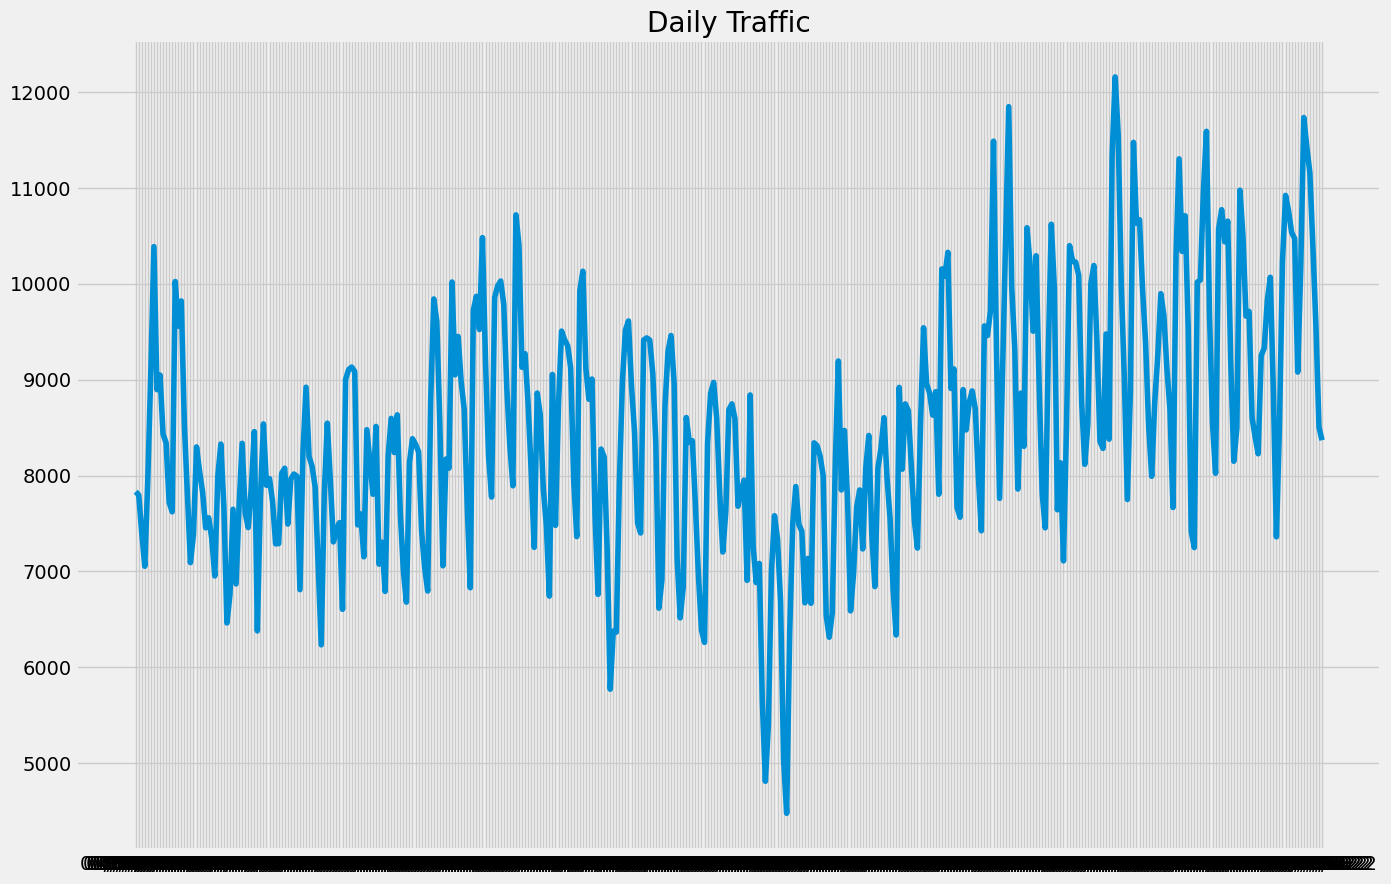

In [ ]:
import matplotlib.pyplot as plt # Importing the matplotlib library and assigning it to the alias 'plt'
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic")
plt.show()


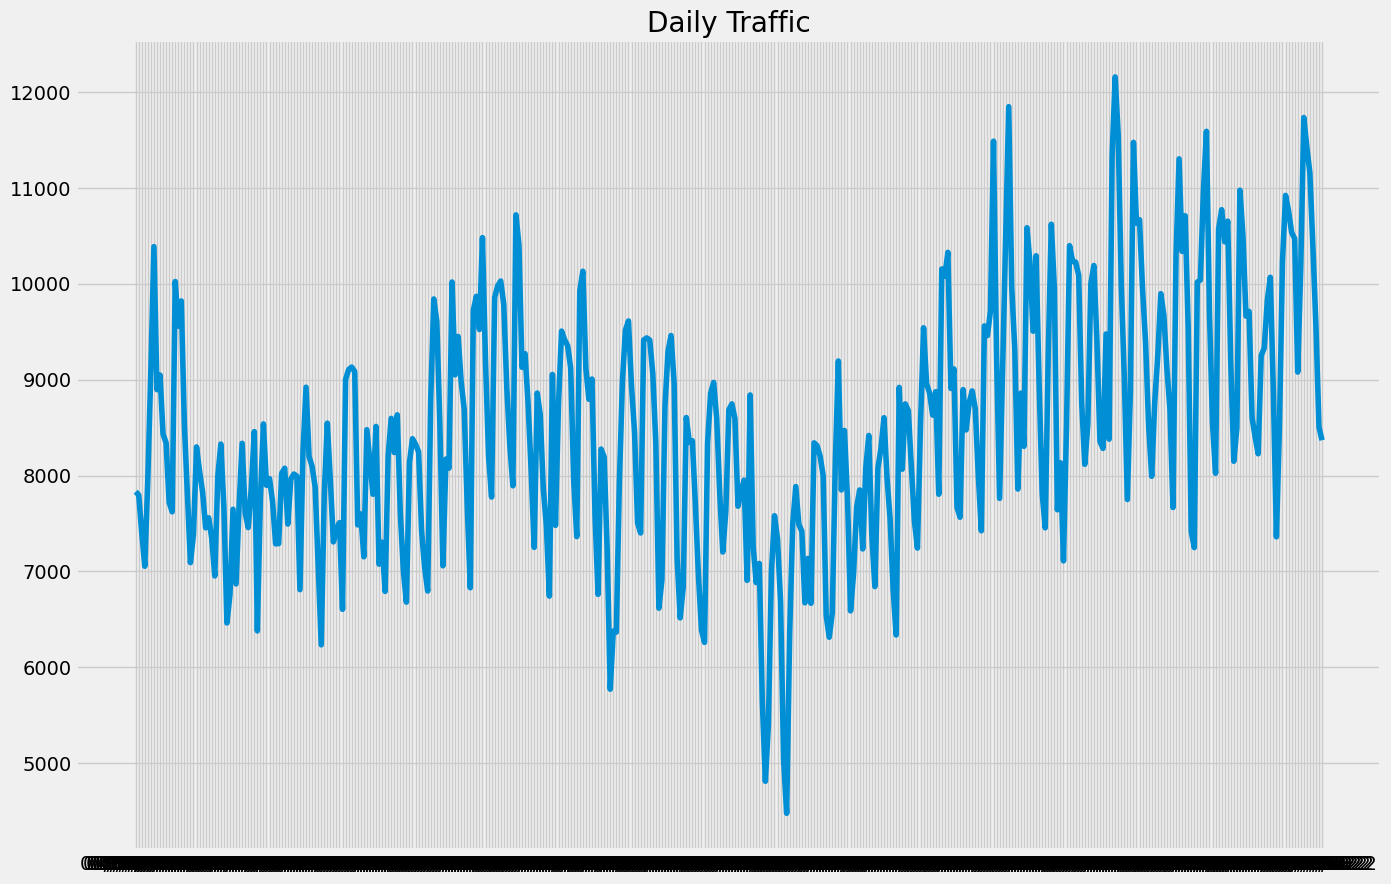

<Figure size 640x480 with 0 Axes>

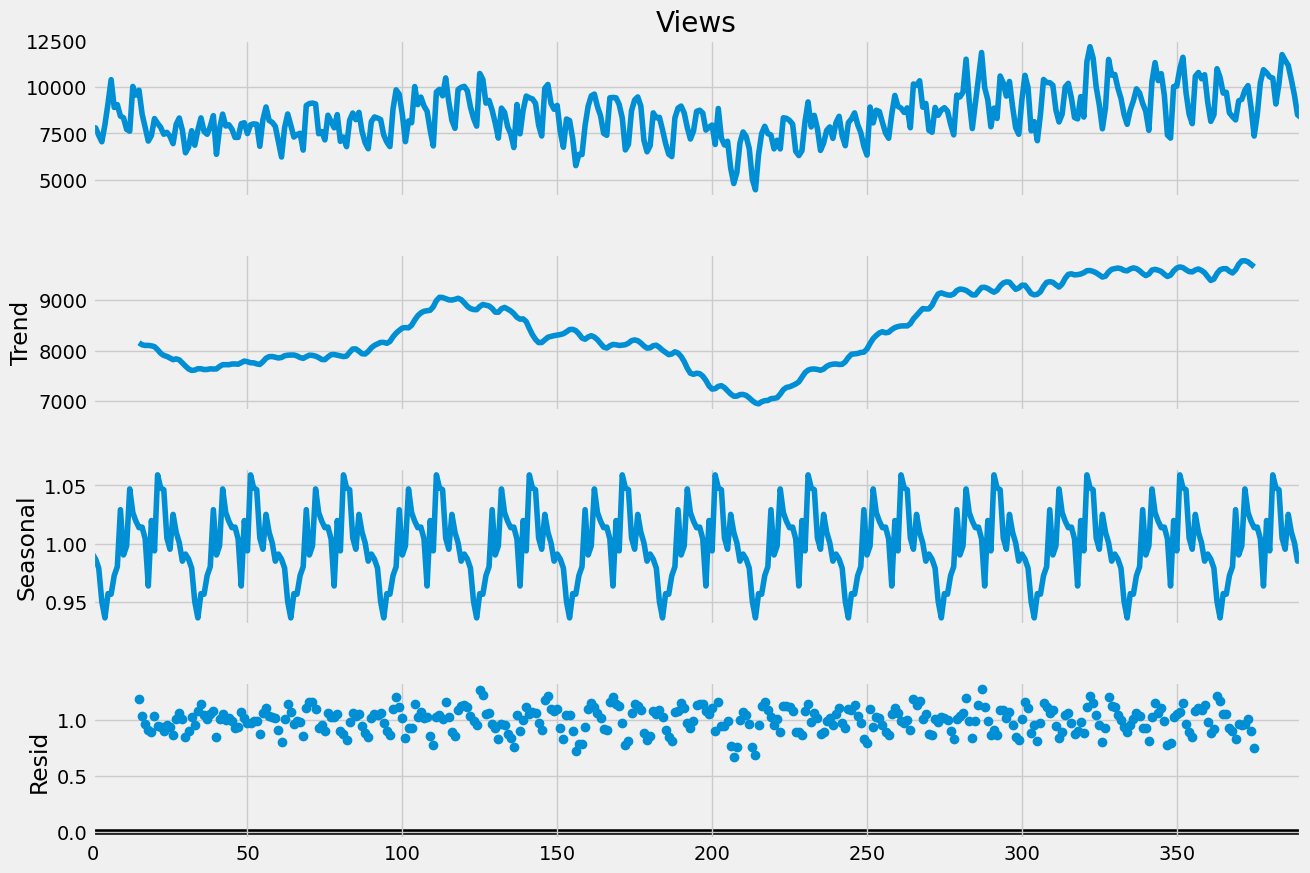

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic")
plt.show()

result = seasonal_decompose(data["Views"], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

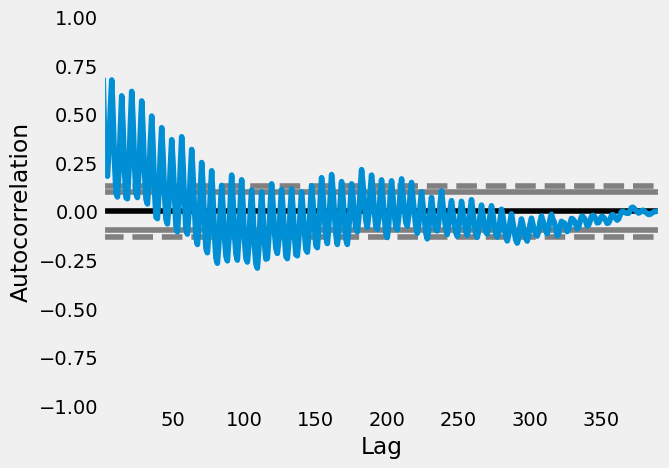

In [ ]:
pd.plotting.autocorrelation_plot(data["Views"])

In [ ]:
!pip install decision-tree-id3
import matplotlib as plt
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six']=six
from id3 import Id3Estimator

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=c00a3467a4b63b56bb8727da540d4b2ddad7e0c123906898f4fa4c8b0a03e779
  Stored in directory: /root/.cache/pip/wheels/54/e9/72/00b38b5d4f4464d8ee5ed73092f2167c88bac31e01fcc17d38
Successfully built decision-tree-id3


In [ ]:
data=pd.read_csv("/content/Websiteforecasting2.csv")
data.head(5)

,Date,Views,Country,Traffic,Rating
0,01/06/2021,7831,USA,234.0,2
1,02/06/2021,7798,Germany,235.0,3
2,03/06/2021,7401,Africa,236.0,4
3,04/06/2021,7054,India,237.0,5
4,05/06/2021,7973,Pakistan,NaN,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip() # Strip spaces from column names

if 'Country' in data.columns:
    data['Date'] = Le.fit_transform(data['Date'])
    data['Views'] = Le.fit_transform(data['Views'])
    data['Country'] = Le.fit_transform(data['Country'])
    data['Traffic'] = Le.fit_transform(data['Traffic'])
    data['Rating'] = Le.fit_transform(data['Rating'])
else:
    print("Country column not found in the data.")

print(data.columns)

Index(['Date', 'Views', 'Country', 'Traffic', 'Rating'], dtype='object')


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()  # Trim spaces from column names

if 'Traffic' in data.columns:
    y = data['Traffic']
    X = data.drop('Traffic', axis=1)
else:
    print("Traffic column not found in the data.")
    # Handle the case where 'Traffic' column is not present (e.g., set a default value for y)
    y = None  # or y = pd.Series([0] * len(data))
    X = data


print(y)

0      234.0
1      235.0
2      236.0
3      237.0
4        NaN
       ...  
386    890.0
387      0.0
388    900.0
389    246.0
390    234.0
Name: Traffic, Length: 391, dtype: float64


In [ ]:
X

,Date,Views,Country,Rating
0,01/06/2021,7831,USA,2
1,02/06/2021,7798,Germany,3
2,03/06/2021,7401,Africa,4
3,04/06/2021,7054,India,5
4,05/06/2021,7973,Pakistan,4
...,...,...,...,...
386,22/06/2022,11154,Japan,3
387,23/06/2022,10382,Nepal,5
388,24/06/2022,9555,Korea,4
389,25/06/2022,8502,USA,2


In [ ]:
!pip install decision-tree-id3

In [ ]:
data.columns = data.columns.str.strip()  # Trim spaces from column names

if 'Traffic' in data.columns:
    y = data['Traffic']
    X = data.drop('Traffic', axis=1)
else:
    print("Traffic column not found in the data.")
    # Handle the case where 'Traffic' column is not present (e.g., set a default value for y)
    y = None  # or y = pd.Series([0] * len(data))
    X = data

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

# Load the data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()  # Trim spaces from column names

# Handle NaN values in the target variable (y)
data = data.dropna(subset=['Traffic'])
y = data['Traffic']
X = data.drop('Traffic', axis=1)

# Identify categorical columns (non-numeric)
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply OrdinalEncoder to categorical columns
ordinal_encoder = OrdinalEncoder()

for column in categorical_columns:
    X[column] = ordinal_encoder.fit_transform(X[[column]])

# Convert 'Date' column if it's in string format
if 'Date' in X.columns:
    # Ensure 'Date' is in a format that can be encoded properly, convert to datetime first if needed
    if X['Date'].dtype == 'object':  # If 'Date' is a string, convert to datetime first
        X['Date'] = pd.to_datetime(X['Date'], errors='coerce')  # Handle invalid dates by coercing them to NaT
        X['Date'] = X['Date'].fillna(method='ffill')  # Fill missing dates with forward fill or handle otherwise
    # Now use OrdinalEncoder if needed
    X['Date'] = ordinal_encoder.fit_transform(X[['Date']])

# Split the data into training and testing sets (80% train, 20% test is a common split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Make predictions
x_pred = clf.predict(x_test)

# Print classification report
print(classification_report(y_test, x_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
       234.0       0.12      0.25      0.17         4
       235.0       0.11      0.12      0.12         8
       236.0       0.00      0.00      0.00         8
       237.0       0.00      0.00      0.00         8
       240.0       0.00      0.00      0.00         6
       246.0       0.00      0.00      0.00         3
       567.0       0.00      0.00      0.00        13
       890.0       0.00      0.00      0.00         8
       900.0       0.00      0.00      0.00         6

    accuracy                           0.03        78
   macro avg       0.02      0.04      0.03        78
weighted avg       0.02      0.03      0.02        78



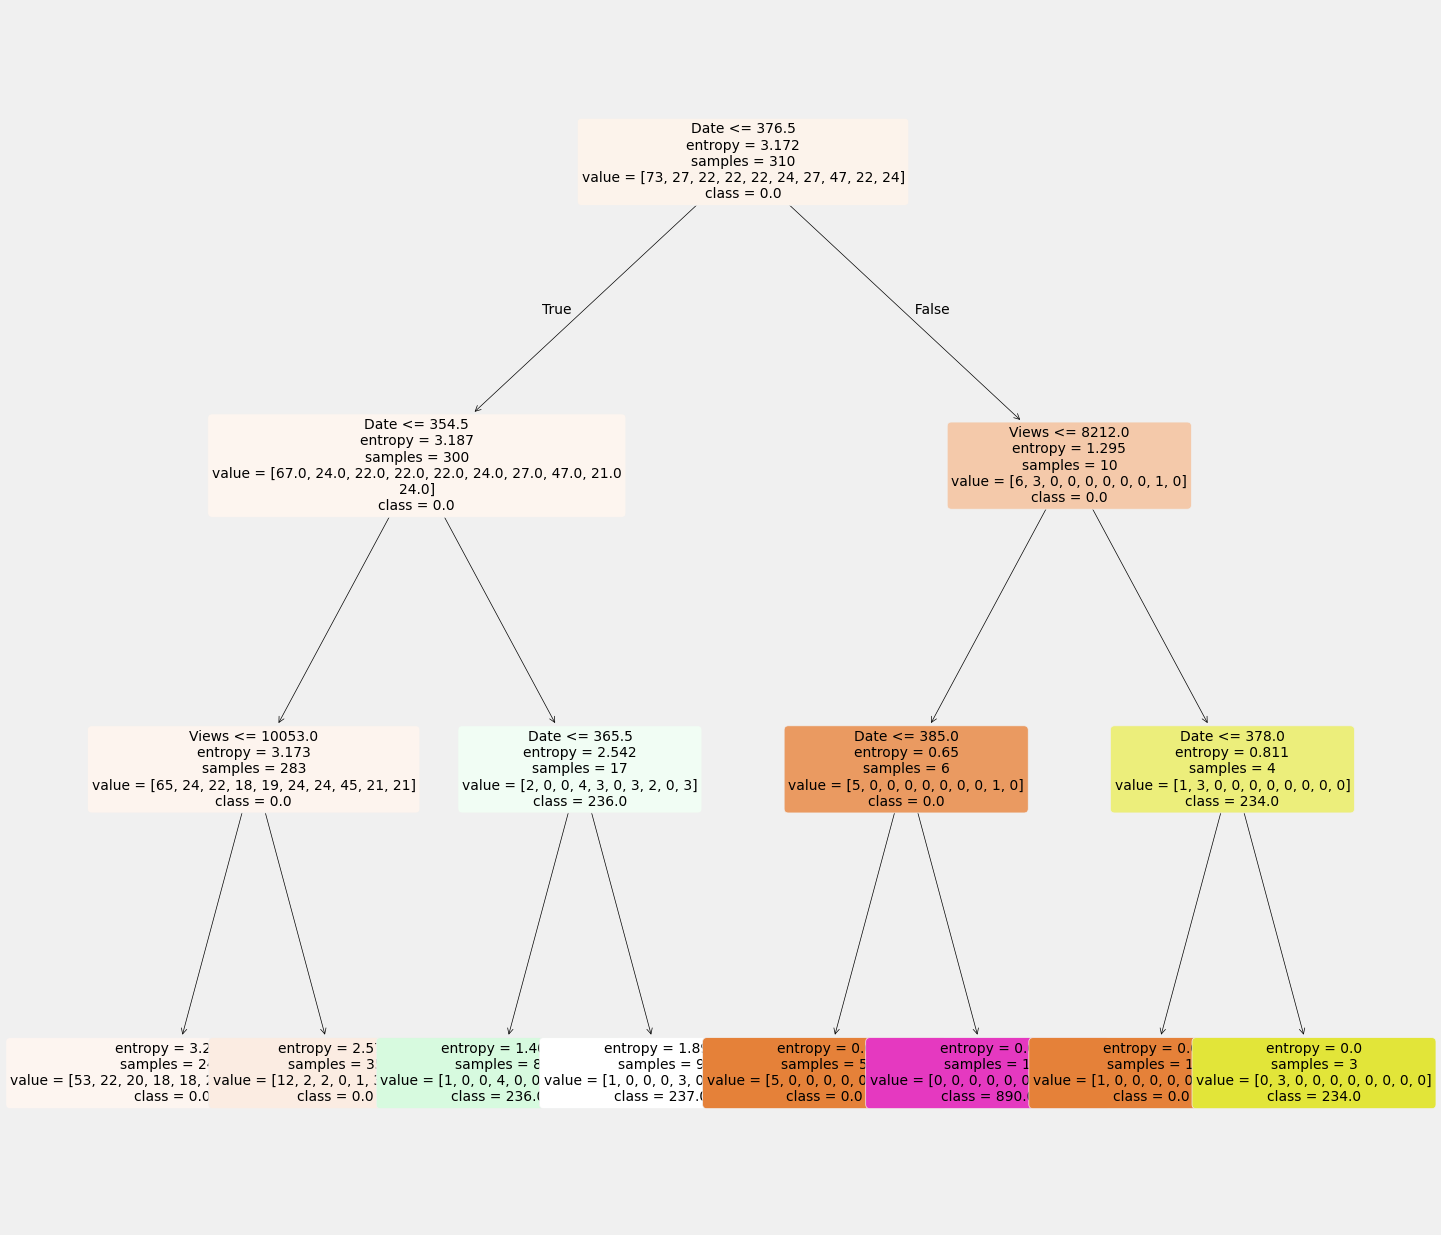

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# Initialize the classifier with max_depth to make the tree more manageable
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Limit depth for separation

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Plot the decision tree, making sure each node is visible and separated
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust figure size to fit tree properly

tree.plot_tree(
    clf,
    fontsize=10,
    ax=ax,
    feature_names=X.columns,  # Show feature names at each node
    class_names=[str(i) for i in clf.classes_],  # Show class labels
    filled=True,  # Color the nodes by class
    rounded=True,  # Rounded corners for aesthetic appearance
    max_depth=3  # Limiting depth helps visualize nodes better
)

# Display the tree plot
plt.show()


In [ ]:
X_pred = clf.predict(x_test)


Accuracy: 0.44871794871794873
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        42
           1       0.36      0.25      0.30        36

    accuracy                           0.45        78
   macro avg       0.43      0.43      0.42        78
weighted avg       0.43      0.45      0.43        78



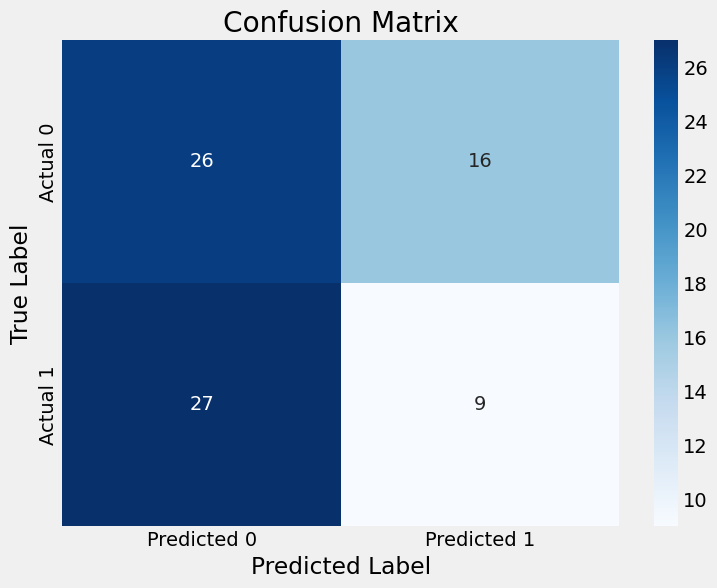

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Preprocess Data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Traffic'])

# 2. Prepare Target Variable for Binary Classification
threshold = data['Traffic'].median()
data['Traffic_Binary'] = (data['Traffic'] > threshold).astype(int)

# 3. Split Data
X = data.drop(['Traffic', 'Traffic_Binary'], axis=1)
y = data['Traffic_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Feature Engineering and Scaling
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ['Date', 'Country']
for col in categorical_cols:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

numerical_cols = ['Views', 'Rating']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5. Model Training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

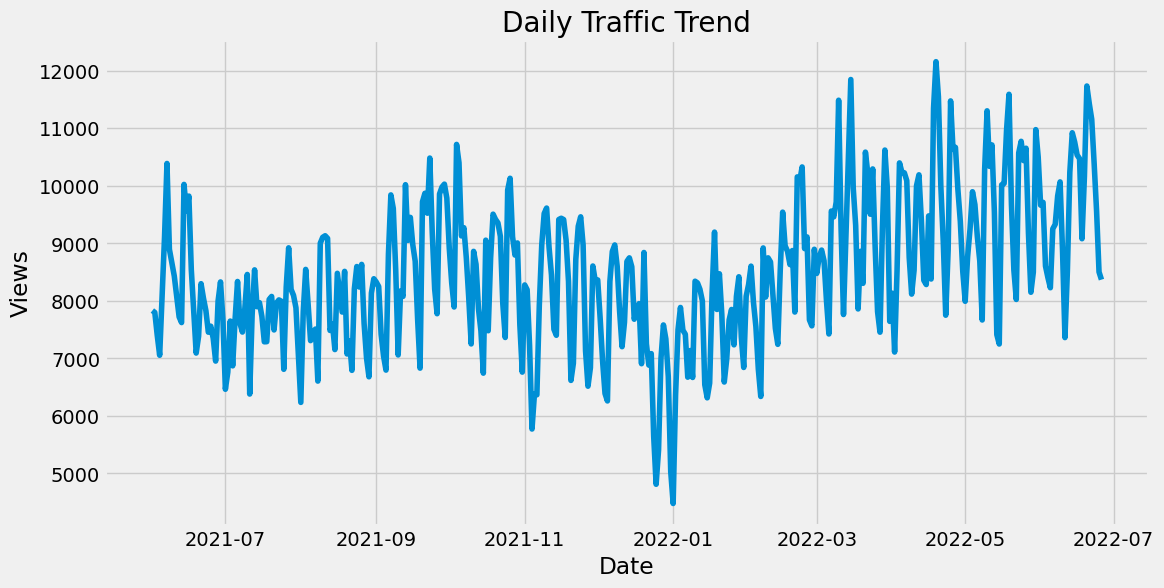

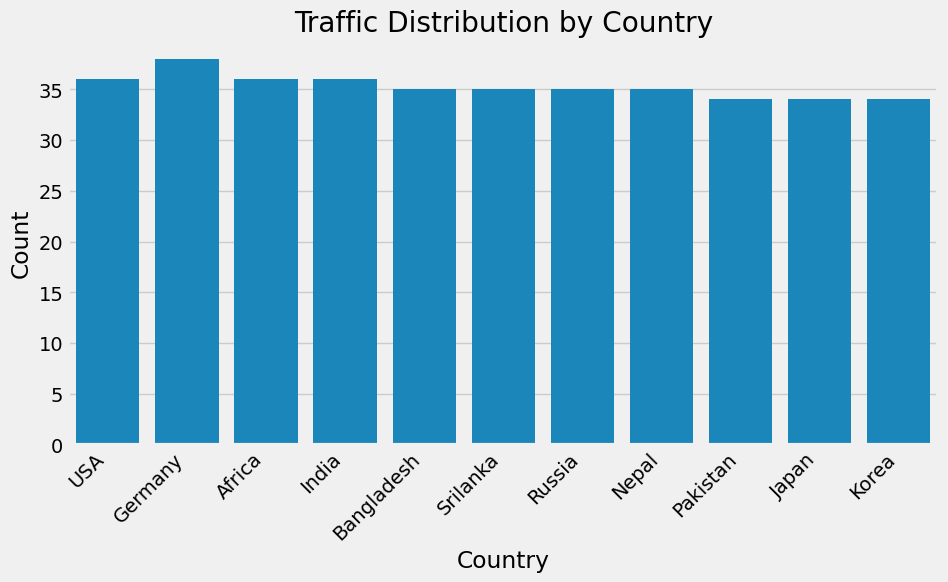

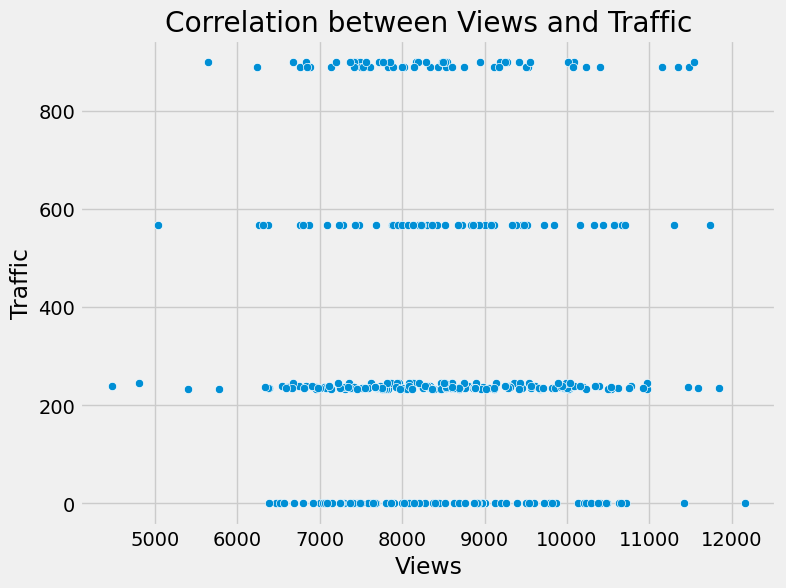

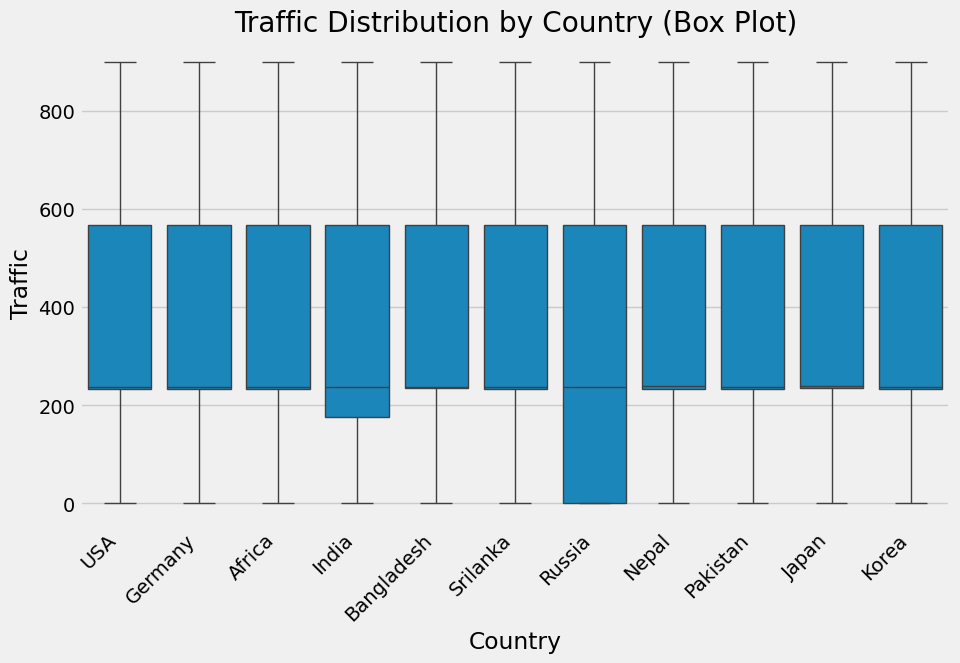

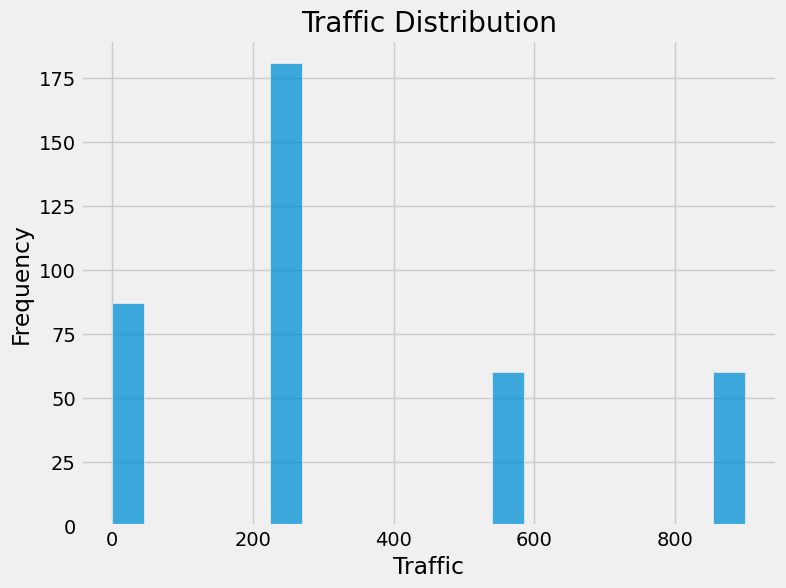

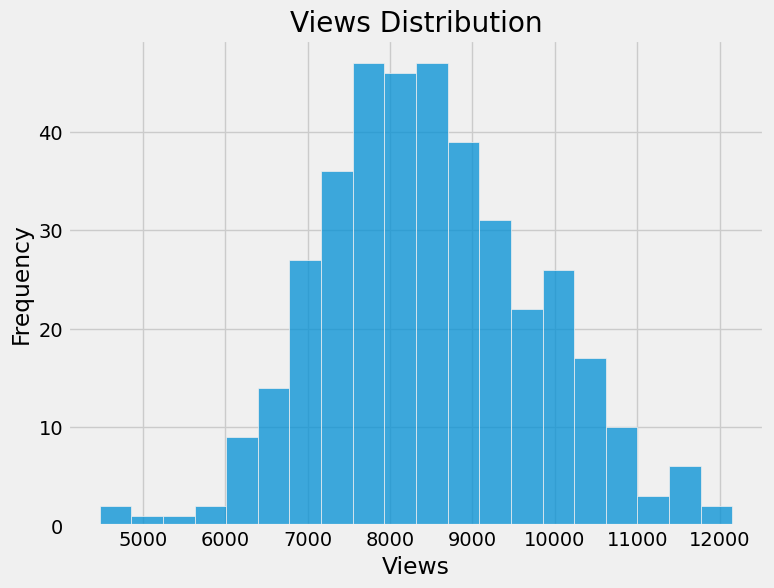

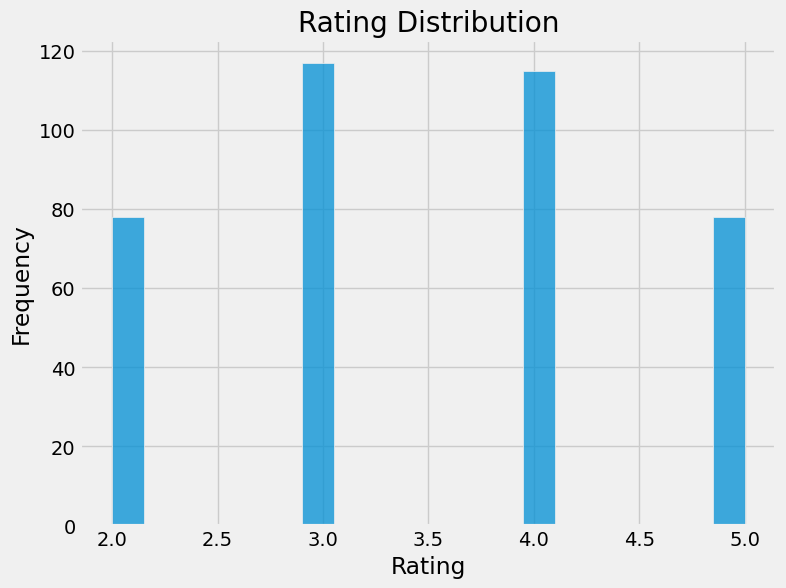

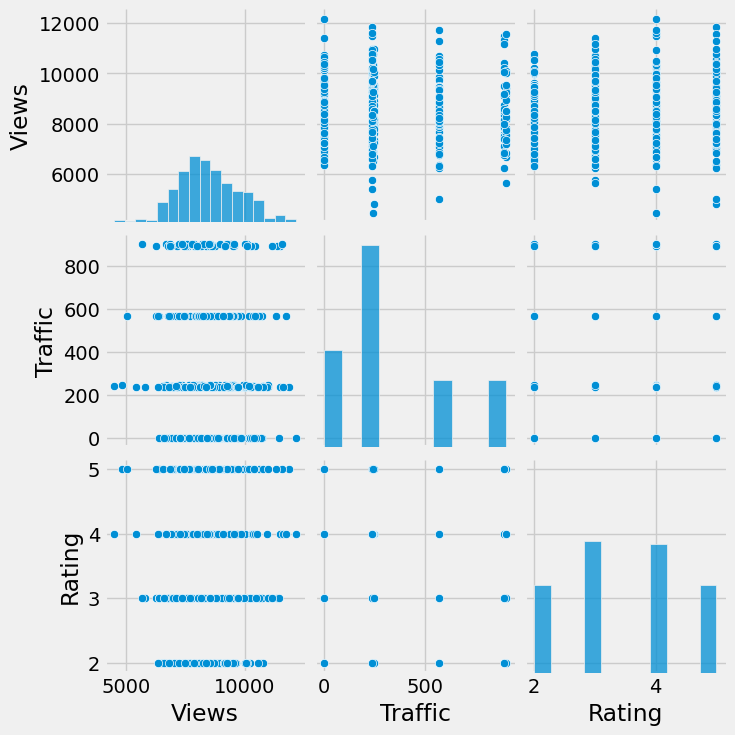

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Traffic'])
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")


# 2. Daily Traffic Trend
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic Trend")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)
plt.show()

# 3. Traffic Distribution by Country
plt.figure(figsize=(10, 5))
sns.countplot(x="Country", data=data)
plt.title("Traffic Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# 4. Correlation between Views and Traffic
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Views", y="Traffic", data=data)
plt.title("Correlation between Views and Traffic")
plt.xlabel("Views")
plt.ylabel("Traffic")
plt.grid(True)
plt.show()

# 5. Box Plot of Traffic by Country
plt.figure(figsize=(10, 6))
sns.boxplot(x="Country", y="Traffic", data=data)
plt.title("Traffic Distribution by Country (Box Plot)")
plt.xlabel("Country")
plt.ylabel("Traffic")
plt.xticks(rotation=45, ha="right")
plt.show()

# 6. Traffic Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data["Traffic"], bins=20)  # Adjust bins as needed
plt.title("Traffic Distribution")
plt.xlabel("Traffic")
plt.ylabel("Frequency")
plt.show()

# 7. Views Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data["Views"], bins=20)  # Adjust bins as needed
plt.title("Views Distribution")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()


# 8. Rating Distribution (if applicable)
if 'Rating' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data["Rating"], bins=20)  # Adjust bins as needed
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()

# 9. Pairplot for Numerical Features
numerical_features = ['Views', 'Traffic', 'Rating']  # Include 'Rating' if applicable
sns.pairplot(data[numerical_features])
plt.show()

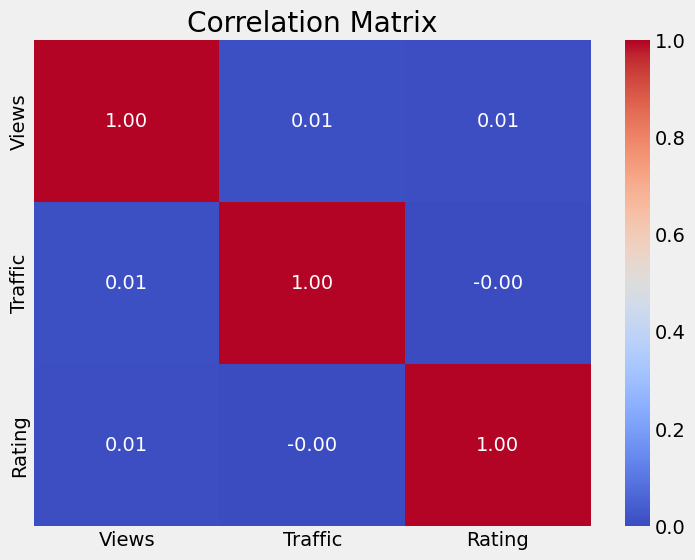

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()  # Trim spaces from column names
data = data.dropna(subset=['Traffic'])  # Handle NaNs in target


# 2. Select numerical features (including 'Traffic')
numerical_features = ['Views', 'Traffic', 'Rating']  # Include 'Rating' if applicable
numerical_data = data[numerical_features]

# 3. Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# 4. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Mean Squared Error: 90807.85974019484
R-squared: -0.023302262254173645


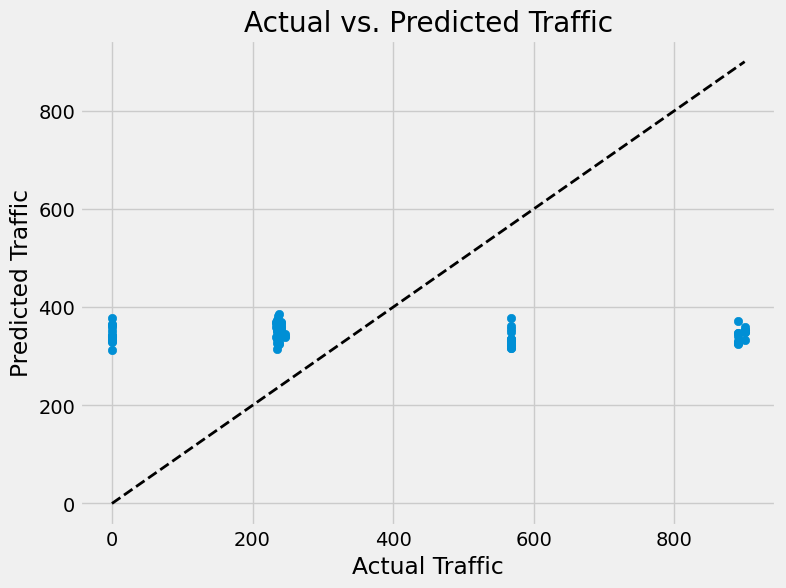

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Preprocess Data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Traffic'])

# 2. Prepare Target Variable (Traffic - continuous)
# No need to create a binary target, we'll use 'Traffic' directly

# 3. Split Data
X = data.drop(['Traffic'], axis=1)  # Features
y = data['Traffic']  # Target variable (continuous)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Feature Engineering and Scaling
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ['Date', 'Country']
for col in categorical_cols:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

numerical_cols = ['Views', 'Rating']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5. Model Training using Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = linear_reg.predict(X_test)

# Evaluate using metrics suitable for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Traffic")
plt.ylabel("Predicted Traffic")
plt.title("Actual vs. Predicted Traffic")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# 1. Load and Preprocess Data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Traffic'])

# 2. Prepare Target Variable for Binary Classification
threshold = data['Traffic'].median()
data['Traffic_Binary'] = (data['Traffic'] > threshold).astype(int)

# 3. Split Data
X = data.drop(['Traffic', 'Traffic_Binary'], axis=1)
y = data['Traffic_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Feature Engineering and Scaling
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ['Date', 'Country']
for col in categorical_cols:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

numerical_cols = ['Views', 'Rating']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5. Model Training using SVM
svm_classifier = SVC(kernel='linear', random_state=0)  # You can try different kernels like 'rbf', 'poly'
svm_classifier.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        42
           1       0.00      0.00      0.00        36

    accuracy                           0.54        78
   macro avg       0.27      0.50      0.35        78
weighted avg       0.29      0.54      0.38        78

[[42  0]
 [36  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# 1. Load and Preprocess Data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Traffic'])

# 2. Prepare Target Variable for Binary Classification
threshold = data['Traffic'].median()
data['Traffic_Binary'] = (data['Traffic'] > threshold).astype(int)

# 3. Split Data
X = data.drop(['Traffic', 'Traffic_Binary'], axis=1)
y = data['Traffic_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Feature Engineering and Scaling
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ['Date', 'Country']
for col in categorical_cols:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

numerical_cols = ['Views', 'Rating']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5. Model Training using KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3974358974358974
              precision    recall  f1-score   support

           0       0.42      0.31      0.36        42
           1       0.38      0.50      0.43        36

    accuracy                           0.40        78
   macro avg       0.40      0.40      0.39        78
weighted avg       0.40      0.40      0.39        78

[[13 29]
 [18 18]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# 1. Load and Preprocess Data
data = pd.read_csv("/content/Websiteforecasting2.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Traffic'])

# 2. Prepare Target Variable for Binary Classification
threshold = data['Traffic'].median()
data['Traffic_Binary'] = (data['Traffic'] > threshold).astype(int)

# 3. Split Data
X = data.drop(['Traffic', 'Traffic_Binary'], axis=1)
y = data['Traffic_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Feature Engineering and Scaling
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ['Date', 'Country']
for col in categorical_cols:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

numerical_cols = ['Views', 'Rating']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5. Model Training using Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.38461538461538464
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        42
           1       0.32      0.31      0.31        36

    accuracy                           0.38        78
   macro avg       0.38      0.38      0.38        78
weighted avg       0.38      0.38      0.38        78

[[19 23]
 [25 11]]
